# ¿Cómo podemos construir una base de datos de la empresa para manejar las ventas de productos de principio a fin?

## Introducción

**Contexto comercial.** Usted es analista de datos para la misma gran empresa de servicios financieros . La empresa quedó satisfecha con su análisis previo y ahora ven el valor de tener bases de datos que se pueden consultar fácilmente mediante SQL. Por lo tanto, le gustaría mover sus datos, que actualmente están almacenados como archivos CSV, a una base de datos adecuada.

**Problema comercial.** La empresa desea que cree una base de datos para albergar sus datos existentes y agregue algunas tablas de datos más para realizar un seguimiento de la información adicional que les interesa.

**Contexto analítico.** Los datos se dividen en tres tablas: "Agents", "Calls" y "Customers", que se encuentran en archivos CSV. Crearemos una base de datos y luego cargaremos los datos de estos archivos CSV en esa base de datos.

El caso lo haremos de siguiente manera: (1) aprenderá los fundamentos de los sistemas de administración de bases de datos; (2) instalar y configurar PostgreSQL, un popular sistema de administración de bases de datos de código abierto, en su máquina local; (3) usar SQL para configurar una nueva base de datos con tablas en PostgreSQL; (4) consultar nuestra base de datos recién creada para responder preguntas comerciales; y finalmente (5) mejoras de diseño a nuestra base de datos para adaptarse a los requisitos comerciales ampliados.




# Parte I

## Database management systems 

En la vida real usamos **sistemas de administración de bases de datos** para administrar las bases de datos correctamente. Todos los ejemplos mencionados en el caso anterior (SQL Server, Oracle, PostgreSQL) son, de hecho, sistemas de administración de bases de datos (en adelante, nos referiremos a ellos como DBMS) y no bases de datos (también conocidas como DB).

Pero, ¿por qué surgieron estos DBMS? ¿Por qué no fue suficiente una base de datos? Para responder a eso, imagine nuestro ejemplo donde tenemos el registro de la guía telefónica, donde realiza un seguimiento de todos sus amigos y sus números de teléfono, pero ahora en un archivo de texto en su computadora. Entonces tienes el siguiente archivo:

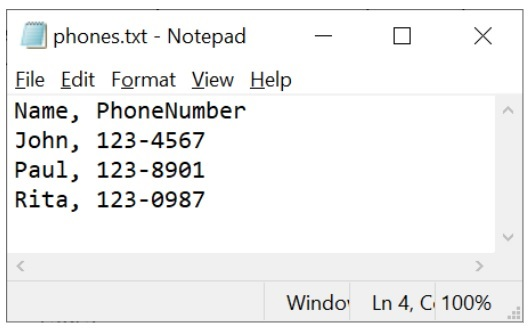

Eso se ve bien y funciona como era de esperar. Pero ahora imagina que subes un video de YouTube de ti mismo bailando una nueva canción y, debido a tus increíbles movimientos de baile, ese video se vuelve viral. Como resultado, te conviertes en la persona más popular de tu vecindario y todos quieren ser tus amigos. Dado que desea realizar un seguimiento de todos los números de teléfono de sus nuevos amigos, decide agregar todos estos nuevos contactos a su archivo "phones.txt". Pero dada la cantidad de nuevos amigos que está haciendo, le pide a su hermana que lo ayude a agregar nuevos amigos a la lista.

Siendo un tipo experto en tecnología, comparte la carpeta donde se encuentra el archivo en su red doméstica y crea un acceso directo en la computadora portátil de su hermana. Ella abre el archivo y ambos comienzan a agregar nuevos contactos al archivo al mismo tiempo. Cada uno de ustedes guarda individualmente el archivo cuando haya terminado y se vaya a dormir. Pero cuando te despiertas a la mañana siguiente, ¡notas que la mitad de todos los contactos se han ido!

### Ejercicio 1:

¿Qué crees que salió mal aquí?

**Respuesta.** Aunque ambas operaciones de guardado funcionaron correctamente y en realidad se guardaron en la base de datos, la primera persona que guardó el archivo más tarde sobrescribió su versión con la segunda solicitud de guardado, usando solo los datos ingresados por la segunda persona. Prevenir esto (y otros escenarios aún más complejos y peligrosos) es la razón por la que nació DBMS.

## Set up PostgreSQL 

En este caso, vamos a utilizar PostgreSQL porque es fácil de instalar y porque es de código abierto. A medida que adquiera más dominio de SQL, puede probar la versión no comercial de SQL Server, ya que ofrece muchas características avanzadas, así como una excelente herramienta para administrar la base de datos (SQL Server Management Studio), y además es muy probable que su organización tiene una base de datos de SQL Server por ahí. En casos posteriores, también utilizaremos Amazon RDS para trabajar con bases de datos en la nube.

PostgreSQL se desarrolló originalmente para plataformas similares a UNIX, pero también se diseñó para ser portátil. Esto significa que PostgreSQL también puede ejecutarse en otras plataformas, como Mac OS X, Solaris y Windows. Para descargar PostgreSQL, primero vaya a la página de descarga de los instaladores de PostgreSQL: https://www.enterprisedb.com/downloads/postgres-postgresql-downloads y seleccione la versión de su instalador. Una vez descargado el instalador, sigan estos pasos:

1. Hagan doble clic en el archivo del instalador. Aparecerá un asistente de instalación que lo guiará a través de múltiples pasos donde puede elegir diferentes opciones que le gustaría tener en PostgreSQL

   
2. Click en "Next" button

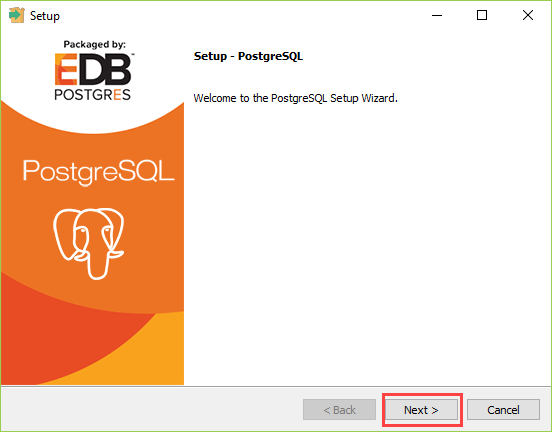

  
3. Especificar el folder de instalacion; elige uno o deja el folder por defecto sugerido por el instalador de PostgreSQL luego click en "Next" button
  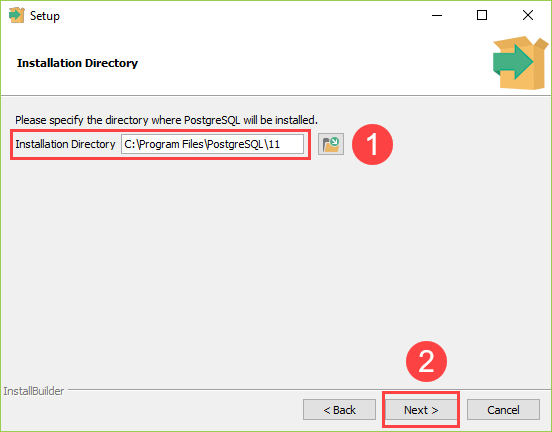

4. Elegir los componentes que quieren instalar y dar click en "Next"</
  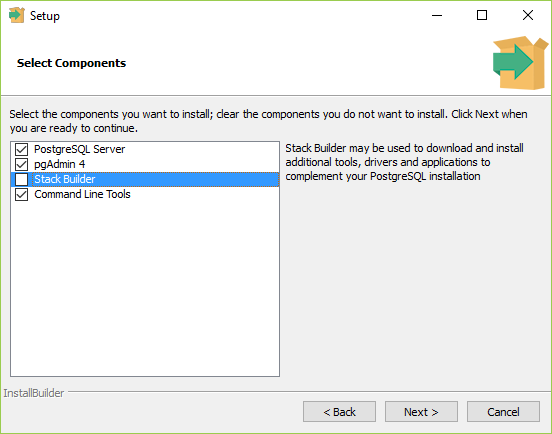

5. Seleccionar el directorio para la base de datos donde vas a guardar la información. Dejalo por defecto o elige uno propio luego  click en "Next" 
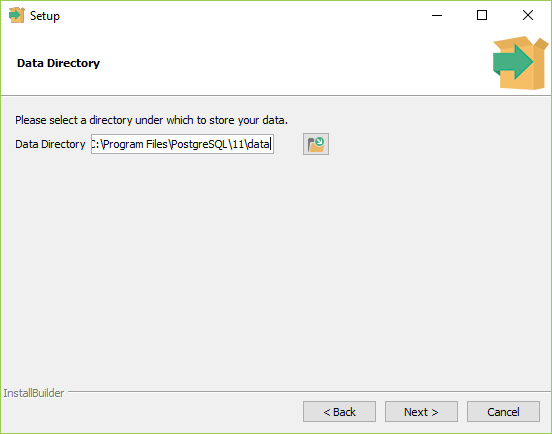

6. Ingresa un password para el superusuario de la base de datos (postgres)</div></td>
 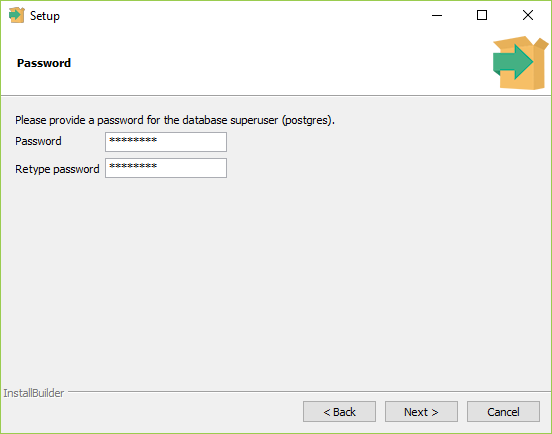

7. Elige el puerto para PostgreSQL puede ser el por defecto. Asegurate que no hayan otras aplicaciones en el puerto para eso (e.g wn Windows abrir un cmd y copiar esto: netstat -ano -p tcp). Lo puedes dejar por defecto si es que no estas seguro

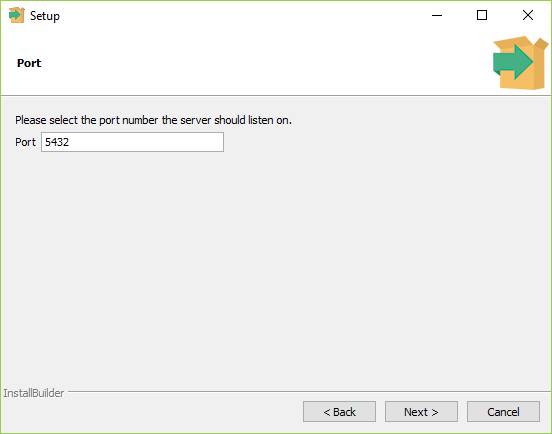

8. Elegir la configuracion regional predeterminada y dar click en "Next"
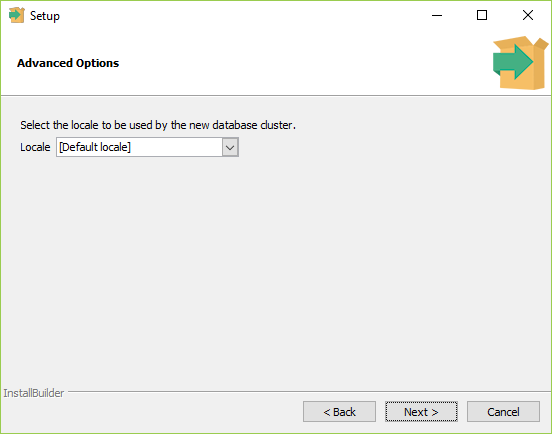

9. Ya estas listo para instalar PostgreSQL! Click en "Next" para empezar la instalacion. (La instalacion puede tomar unos minutos en completarse.

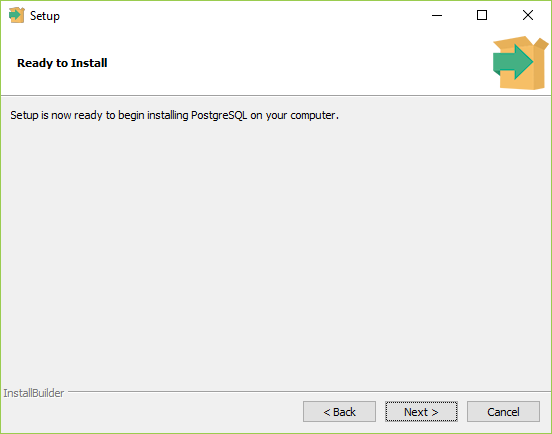

10. Click en "Finish" para completar la instalacion de PostgreSQL

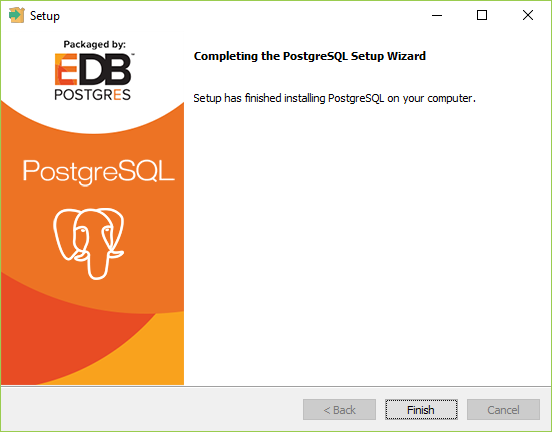

## Montaje y consulta de nuestras tablas

Ahora podemos comenzar a trabajar en PostgreSQL. Lo primero que necesitará es un IDE para ejecutar sus consultas. Usaremos **pgAdmin 4**, que ya se instaló como parte de la instalación principal. En caso de que haya instalado una versión de PostgreSQL que no contenga pgAdmin, puede descargarla desde este enlace: https://www.pgadmin.org/.

Lo primero que deben hacer es conectarse a PostgreSQL utilizando la información proporcionada durante el proceso de instalación. Una vez que esté conectado, tendrá que crear una base de datos. El nombre de la base de datos no es importante en este contexto (no siempre es el caso cuando trabaja en proyectos profesionales con muchas otras personas), así que elija un nombre que tenga sentido para ustedes.

**El paso siguiente es abrir pgAdmin4, ponemos el password**

Ahora entramos a las databases colocando nuestro password

Ponemos conectarnos a diferentes bases de datos 
Demos click derecho en PostgreSQL > Create > Database

Aparecera la siguiente venta y le ponemos un nombre


Debera aparecer algo asi en nuestro entorno

# Parte II

### Data Definition Language (DDL) en SQL 

Presentamos brevemente las declaraciones DDL al final del caso anterior; aquí, aprenderemos sobre ellos y los pondremos en uso. Recuerde que estas instrucciones se utilizan para crear, modificar y eliminar los propios objetos de la base de datos, así como los datos que contienen.

El comando mas importante de DDL es `CREATE TABLE`. Para crear una tabla debes proveer un nombre, sus columnas, y el tipo de cada columna. Por ejemplo, el siguiente comando SQL crea una tabla llamada `products`, con un campo tipo `INTEGER` llamado `productid` y un campo `VARCHAR(20)` (string hasta 20 caracteres) llamado `productname`:

```SQL
CREATE TABLE products(productid INT, productname varchar(20))
```

Una vez que haya creado una tabla, puede usar ciertas declaraciones DML para manipular datos en las propias tablas (en lugar de simplemente en los resultados de las consultas, como hizo en el caso anterior). Estos comandos son:

1. `INSERT`: insertar datos a la tabla
2. `UPDATE`: actualizar datos existentes dentro de una tabla 
3. `DELETE`: eliminar records de una tabla en una database

A continuación hay información adicional sobre cada uno:

1. El comando INSERT INTO se usa para añadir filar a la tabla, su sintaxis es:

    ```SQL
    INSERT INTO table_name (column1, column2, column3,...)
    VALUES (value1, value2, value3,...)
    ```
    Alternativamente, si está agregando valores para todas las columnas de la tabla, no necesita especificar los nombres de las columnas.

2. El comando `UPDATE` se utiliza para modificar los registros existentes en una tabla. Usted indica qué tabla está actualizando y luego proporciona las columnas que desea modificar seguidas de una condición (clausula `WHERE`) que especifica qué registro(s) debe(n) actualizarse. Si omites la clausula `WHERE` ¡todos los registros de la tabla se actualizarán!

```SQL
UPDATE table_name
SET column1 = value1, column2 = value2,...
WHERE condition;
```

3. El comando `DELETE` se usa para borrar registros existentes:

```SQL
DELETE FROM table_name
WHERE condition
```
De manera similar a la sintaxis de `UPDATE`, la cláusula `WHERE` especifica qué registros deben eliminarse. Si omite la cláusula `WHERE`, se eliminarán todos los registros de la tabla, ¡así que tenga MUCHO cuidado con esta declaración!

### Ejercicio 2: 

Configure una nueva base de datos con las siguientes tablas y condiciones de columna:

1. Table Name: `customers` 
   Columns:
      * customerid INT 
      * name VARCHAR(50)
      * occupation VARCHAR(50)
      * email VARCHAR(50)
      * company VARCHAR(50)
      * phonenumber VARCHAR(20)
      * age INT
      

2. Table Name: `agents`
   Columns:
      * agentid INT
      * name VARCHAR(50)


3. Table Name: `calls`
   Columns:
      * callid INT
      * agentid INT
      * customerid INT
      * pickedup SMALLINT
      * duration INT
      * productsold SMALLINT

**Respuesta.**

```SQL
CREATE TABLE customers(
    customerid INT primary key,
    name VARCHAR(50),
    occupation VARCHAR(50),
    email VARCHAR(50),
    company VARCHAR(50),
    phonenumber VARCHAR(20),
    age INT
);

CREATE TABLE agents(
    agentid INT primary key,
    name VARCHAR(50)
);

CREATE TABLE calls(
    callid INT primary key,
    agentid INT,
    customerid INT,
    pickedup SMALLINT,
    duration INT,
    productsold SMALLINT
);
```

No es menor finalizar los querys con ; en PostgreSQL

**Procedimiento básico**

Para crear las tablas debemos hacer lo siguiente:

1. Click derecho en la database > Query Tool


2. Aparecera una ventana como esta:

3. Pueden ejecutar el query dando click en el relampago 

4. Ahora debemos revisar en Schemas si nuestras tablas fueron creadas (3 en total)

Podemos ver incluso el contenido de las tablas, sino funciona podemos usar el query tool.

### Ejercicio 3 (No hacerlo en el vivo)

Cargue las tablas recién creadas con datos. PostgreSQL nos ofrece el comando COPY para importar un archivo CSV a una tabla de base de datos. La estructura de la sentencia COPY es la siguiente:

```
COPY tablename(column1, columns2, …., columnN) <br>    
FROM [file path] DELIMITER '[delimiter]' CSV HEADER;
```

1. Especifique la tabla con los nombres de las columnas después de la palabra clave `COPY`. El orden de las columnas debe ser el mismo que en el archivo CSV. Si el archivo CSV contiene exactamente las columnas que desea en la tabla, entonces no tiene que especificar las columnas explícitamente.

2. Especifique la ruta del archivo CSV después de la palabra clave `FROM`. Debido a que se utiliza el formato de archivo CSV, debe especificar el delimitador después de la palabra clave `DELIMITER`, así como la palabra clave `CSV`.

La palabra clave `HEADER` se usa para omitir la primera fila de un archivo CSV (que normalmente contiene los nombres de las columnas). Si no hace esto, PostgreSQL intentará copiar todas las filas en la tabla, lo que probablemente fallará si hay una columna que no sea una cadena (por ejemplo, intentará copiar la cadena "edad" en una columna de enteros, por ejemplo) .

Tenga en cuenta que el archivo debe ser leído directamente por el servidor PostgreSQL, no por la aplicación cliente. Por lo tanto, debe ser accesible para la máquina del servidor PostgreSQL. Además, puede ejecutar la declaración `COPY` con éxito si tiene acceso de superusuario.

**Respuesta.**
    
```SQL
COPY customer(customerid, name, occupation, email, company, phonenumber, age)
FROM 'CSV file path' DELIMITER ',' CSV HEADER

COPY agents (agentid, name)
FROM 'CSV file path' DELIMITER ',' CSV HEADER

COPY calls(callid, agentid, customerid, pickedup, duration, productsold)
FROM 'CSV file path' DELIMITER ',' CSV HEADER
```

donde el `CSV file path` se reemplaza por la ruta donde tengan los archivos

Lo que vamos a hacer para cargar los datos es lo siguiente:

**Esta parte no es tan sencilla desde el punto de vista local, por que debemos conectarnos a un servidor y debemos tener permisos para hacerlo sobre todo si vamos a trabajar en la nube**

# Parte III

## Usando nuestras tablas de datos para responder preguntas comerciales

Ahora que hemos configurado las tablas exactas que queremos, podemos cosechar las recompensas de nuestro trabajo y escribir declaraciones DML para extraer información y responder preguntas comerciales relevantes.

### Ejercicio 4: 

Dos métricas del desempeño de los agentes de ventas que le interesan a su empresa son: 1) para cada agente, cuántos segundos en promedio les toma vender un producto cuando tienen éxito; y 2) para cada agente, cuántos segundos en promedio permanecen en el teléfono antes de darse por vencidos cuando no tienen éxito. Escribe una consulta que calcule esto.

**Repsuesta.**

```SQL
SELECT a.name,
SUM(
   CASE
       WHEN productsold = 0 THEN duration
       ELSE 0
   END)/SUM(
   CASE
       WHEN productsold = 0 THEN 1
       ELSE 0
   END)
AS avgWhenNotSold ,
SUM(
   CASE
       WHEN productsold = 1 THEN duration
       ELSE 0
   END)/SUM(
       CASE WHEN productsold = 1 THEN 1
       ELSE 0
   END)
AS avgWhenSold
FROM calls c
JOIN agents a ON c.agentid = a.agentid
GROUP BY a.name
ORDER BY 1
```

Para ejecutar hacemos lo siguiente: Click derecho> Query Tool
Ponemos nuestro codigo y lo ejecutamos

### Ejercicio 5: 

Para incentivar a sus agentes de ventas, la firma ofrece un bono para los agentes que logren cerrar una venta más rápido. Escriba una consulta que proporcione, para cada agente, la duración de la venta más rápida de ese agente y el nombre del cliente al que se vendió. Si hay empates (es decir, para el mismo agente, dos ventas con la misma duración), elija la que tenga el valor `customerid` más alto para que forme parte de los resultados de su consulta.

**Respuesta.** 

Vamos a explicar la respuesta en partes

1. Seleccionemos los agentes tomando si duracion minima de la tabla calls cuando hayan vendido 
```SQL
SELECT agentid, min(duration) as fastestcall
FROM calls
WHERE productsold = 1
GROUP BY agentid
```

2. Voy a llamar a la tabla anterior como min (el AS lo pueden quitar). Ahora Ese resultado le har eun join con la tabla calls siempre y cuando el id sea el mismo y la duracion sea igual al minimo encontrado filtrando ventas agrupando por id y duracion. El max(customerid) es con base al criterio dado

```SQL
   SELECT ca.agentid, ca.duration, max(customerid) AS cid
   FROM
   (
       SELECT agentid, min(duration) as fastestcall
       FROM calls
       WHERE productsold = 1
       GROUP BY agentid
   ) AS min
   JOIN calls ca ON ca.agentid = min.agentid AND ca.duration = min.fastestcall
   WHERE productsold = 1
   GROUP BY ca.agentid, ca.duration
```

3. A todo ese resultado ahora lo llamare x y finalmente muestro el resultado final ordenado

```SQL
SELECT a.name AS AgentName, cu.name AS CustomerName, x.duration
FROM
(
   SELECT ca.agentid, ca.duration, max(customerid) AS cid
   FROM
   (
       SELECT agentid, min(duration) as fastestcall
       FROM calls
       WHERE productsold = 1
       GROUP BY agentid
   ) min
   JOIN calls ca ON ca.agentid = min.agentid AND ca.duration = min.fastestcall
   WHERE productsold = 1
   GROUP BY ca.agentid, ca.duration
) x
JOIN agents a ON x.agentid = a.agentid
JOIN customers cu ON cu.customerid = x.cid
```

## Propiedades de sistemas DBMS

Cada base de datos debe exhibir ciertas propiedades para garantizar que los datos que contiene sean confiables. Las **propiedades de ACID** se refieren a cuatro propiedades transaccionales fundamentales de DBMS y significan "Atomicidad, Consistencia, Aislamiento y Durabilidad". Si una herramienta dice ser un DBMS y no presenta todas estas propiedades, entonces no es un DBMS.

Las propiedades se pueden explicar rápidamente de la siguiente manera:

1. **Atomicidad**: Significa “todo o nada”. Tomemos de nuevo el ejemplo de la transferencia bancaria; recuerda que transferir dinero de la Cuenta A a la Cuenta B son dos operaciones separadas. Si el sistema bancario falla justo después de que el dinero sale de la Cuenta A pero antes de que ingrese a la Cuenta B, entonces eso no es "todo o nada" (y es malo). La atomicidad garantiza que una unidad de trabajo se ejecuta por completo o no se ejecuta en absoluto.

2. **Coherencia**: significa que el DBMS evita la corrupción de la base de datos al garantizar que la base de datos siempre sea válida de acuerdo con las reglas en las que se definió (esencialmente, no hay bases de datos "falsas" que no sigan las instrucciones).

3. **Aislamiento**: Garantiza que la ejecución simultánea de transacciones deje la base de datos en el mismo estado que se habría obtenido si las transacciones se hubieran ejecutado secuencialmente. Esto es especialmente importante en los sistemas de bases de datos distribuidas.

4. **Durabilidad**: Esta propiedad garantiza que una vez comprometida la transacción en la base de datos, esta sea duradera. Básicamente, esto significa que no puede recibir un mensaje de "OK" si ocurre algo malo (como un corte de energía) entre el momento en que se escriben los cambios desde el búfer de memoria y el momento en que se escriben en el disco (lo que provoca que la transacción falle).

Las bases de datos **NoSQL**, por otro lado, admiten un conjunto diferente de propiedades llamado BASE, que significa "Básicamente disponible, estado suave, eventualmente consistente" **(Basically Available, Soft state, Eventually consistent)**. No entraremos a detalle en esto aquí, excepto para mencionar que "Eventualmente coherente" significa que "eventualmente" los consumidores pueden no ver la última versión de los datos, lo que puede o no ser un problema según el contexto. Si desea obtener más información, busquen sobre el **Teorema CAP** para sistemas de bases de datos.

# Parte 4
## Diseño de base de datos

La empresa está satisfecha con lo que ha hecho hasta ahora y le gustaría incorporar más elementos de su proceso de ventas integral en la base de datos que ha creado. Sin embargo, es probable que esta complejidad adicional plantee algunos desafíos de diseño de bases de datos. ¿Cuáles son algunos principios importantes que debemos tener en cuenta a medida que ayudamos a la empresa a desarrollar esto?

Repasemos el ejemplo anterior de teléfonos y ciudades, en el que deseaba registrar la ciudad donde vive cada uno de sus contactos. Esto parece bastante sencillo: simplemente agregue una nueva columna a su tabla de "teléfonos" llamada "ciudad" y registre el nombre de la ciudad correcta en cada celda.

### Ejercicio 6: 
¿Qué tipo de problemas y/o ineficiencias cree que podría causar este método?

**Respuesta.**

1. Desperdicia mucho espacio. Por ejemplo, suponga que tiene 1000 amigos en esta base de datos que viven en "San Francisco". La base de datos tendría que almacenar exactamente la misma información, 100 veces, con cada instancia consumiendo 13 caracteres de espacio.
2. Si decide cambiar "San Francisco" a "San Francisco, CA", la base de datos tendría que cambiarlo en 1000 ubicaciones diferentes.
3. Si accidentalmente escribe "san francisco" para una de las celdas, aunque sepa que es igual a "San Francisco", la base de datos las trata de manera diferente. Una situación similar ocurre con los errores tipográficos.
4. Si escribe una consulta con una cláusula `WHERE` que dice `WHERE city = “New York City”`, es posible que pierda filas si (2) o (3) anteriores son verdaderas.

Para solucionar estos (y otros problemas), se inventó el concepto de **formas normales**, que son un conjunto de reglas que deben (**deben**) aplicarse a las tablas de la base de datos para aprovecharlas al máximo. Todos implementan algunas de estas reglas, incluso sin darse cuenta de que lo están haciendo, pero es bueno ser consciente de cuáles son para poder practicar buenos hábitos de manera constante.

Hay un total de 6 formas normales: **1NF, 2NF,..., 6NF**, más algunos intermediarios y alternativas en el medio. No necesita saber acerca de todos estos ahora, excepto 1NF, que discutiremos a continuación. Te sugiero busques en Google acerca de estas formas, pero solo los comprenderan realmente con la práctica y la experiencia, por lo que no tiene sentido memorizarlos ahora. El proceso de representar una base de datos en términos de relaciones en formas normales se conoce como **normalización de base de datos**. Por ejemplo, 1NF dice que:

*“Una relación está en primera forma normal si y solo si el dominio de cada atributo contiene solo valores atómicos (indivisibles), y el valor de cada atributo contiene solo un valor único de ese dominio.*

Realmente no está muy claro desde esa forma, así que en palabras simples es:

1. Las tablas individuales no deben contener información repetida (es decir, información que no sea de identificación)
2. Si originalmente había información repetida, cree una tabla separada para agrupar esa información
3. Identifique cada conjunto de información repetida con una clave principal

De lo anterior, puede concluir que había información repetida de la ciudad en el diseño original; por lo tanto, se debe crear una tabla separada de `cities` para almacenar esa información. Debe haber una clave principal que corresponda a la información repetida de la ciudad y que se pueda usar como clave externa en otras tablas, como `phones`.


Tenga en cuenta que John y Rita viven en Nueva York, mientras que Paul vive en Boston, pero la tabla de `phones` solo tiene la identificación de la ciudad en la que vive cada uno de ellos, en lugar de información sobre la ciudad en sí. También tenga en cuenta que agregamos una identificación a la tabla de `phones` para identificar de manera única a cada amigo (que también es consistente con la definición 1NF).

### Pregunta:

¿Cuáles son sus pensamientos sobre el nombre de tabla `phones`? ¿Es realmente una tabla utilizada para almacenar números de teléfono? ¿Qué pasa si un amigo tiene más de un número de teléfono? ¿Cómo procederías? Hable de esto con las personas que le rodean.

### Ejercicio 7

Para adaptarse a la mayor complejidad de sus esfuerzos de venta de productos de un extremo a otro, su empresa desearía que configurara nuevas tablas y/o modificara las tablas existentes en su base de datos recién creada. Las características adicionales son las siguientes:

1. Cada producto tiene un nombre y los clientes pueden comprar varios productos
2. Algunos productos son actualizaciones de otros; es decir, debe comprar la versión básica antes de poder comprar actualizaciones. En aras de la simplicidad, suponga que cada producto se puede actualizar desde otro producto como máximo.
3. Debe realizar un seguimiento de las compras de los clientes de los diversos productos.

¿Cómo configuraría nuevas tablas y/o modificaría las tablas existentes para adaptarse a estos requisitos? Escriba consultas SQL que realicen esta tarea. Necesitará las siguientes instrucciones DDL adicionales:

La instrucción `ALTER TABLE` se usa para agregar, eliminar o modificar columnas en una tabla existente o para agregar y eliminar restricciones en una tabla existente.

1. Adicionar a una columna:

```SQL
ALTER TABLE "tablename"
ADD "newcolumn" "datatype"
```

2. Dropping de una:

```SQL
ALTER TABLE "tablename"
DROP COLUMN "columnname"
```

**Respuesta.** 

1. Tabla `products`:
    - `productid` con llave primaria (se puede asumir como entero)
    - `productname` nombre del producto (string, razonable asumir VARCHAR(50))
    - `upgradedfromproductid` el ID del producto que se va a mejorar


2. Modificar la tabla `calls`:
    - Adicionar `productid` como foreign key
    
Los codigos SQL apropiados serian entonces:

```SQL
CREATE TABLE products(
    productid INT primary key,
    productname VARCHAR(50),
    upgradedfromproductid INT
)

ALTER TABLE calls
ADD productid INT
```

### Pregunta: (5 mts)

¿Cómo modificaría su diseño en el Ejercicio 7 si:

1. un producto podría actualizarse desde varios productos anteriores
2. ciertos productos solo se pueden vender en ciertos períodos de tiempo (es decir, la disponibilidad del producto es estacional). Puede suponer que este conjunto de períodos no es demasiado grande
3. Tenías que hacer un seguimiento de los tiempos en que los productos están disponibles


### Ejercicio 8

La empresa desea que amplíe el trabajo de diseño de su base de datos a un nuevo almacén de datos que se utilizará para generar informes en tiempo real. El almacén de datos se completará mediante un proceso diario de extracción, transformación y carga **(ETL)** que su equipo también escribirá. La principal fuente de datos proviene del actual proceso de ventas de principio a fin. Además de las tablas en su diseño anterior, aquí hay una lista de tablas adicionales que cree que necesitará:

1. `orders`: contiene información sobre la fecha de venta, la fecha de entrega prevista, el cliente que compró el producto, el valor total de la venta, la dirección de entrega, la empresa de carga y el conductor que realizará la entrega
2. `orderItems`: contiene información sobre cada artículo en el pedido, como: el ID del artículo del pedido, el ID del pedido, el ID del producto, la cantidad del artículo y el precio del producto (tenga en cuenta que el mismo producto se puede vender por diferentes precios en diferentes pedidos)
3. `productCategory`: contiene la descripción de la categoría

¿Cómo diseñaría su almacén de datos para maximizar el rendimiento de lectura? Trabaja en esto con un compañero. Tenga en cuenta que para optimizar el rendimiento de lectura, NO es necesariamente mejor seguir el protocolo de forma normal.

**Respuesta.** 

1. Tener una tabla `orders` que contenga información sobre pedidos y artículos, donde cada fila esté indexada por `orderid` y `orderitemid`. Aunque esto no se ajusta al protocolo de formulario normal, es casi seguro que un sistema de informes que realiza muchas lecturas querrá extraer información sobre pedidos y artículos, por lo que evita muchos productos cartesianos costosos y JOIN de dos tablas que estarán vinculadas en la cadera.
2. Agregue una clave de detalle `itemTotal` a cada fila de la tabla `orders`, que se define como `itemQuantity` veces `productPrice`, ya que este campo probablemente será importante para los informes, que es parte del rendimiento de lectura.
3. Agregue `productcategoryid` como clave externa a la tabla `products`
4. Desglose el campo de dirección de entrega de `orders` en componentes separados como `state`, `city`, `zipcode`, etc. La agregación basada en la ubicación es un tipo de función de informes muy común y tiene que analizar direcciones cada vez. es un dolor a menos que las agrupaciones ya estén bien definidas.

## Propiedades basicas de data warehouses

Mencionamos brevemente el término **Data Warehouse (Almacen de datos)** en el ejercicio anterior, pero ¿qué es realmente? A diferencia de las bases de datos, los datos a menudo se desnormalizan en un Data Warehouse. En entornos profesionales, a veces es posible que deba leer datos de un DataWarehouse en lugar de una base de datos. Ahora, este es un concepto muy avanzado, por lo que no profundizaremos mucho aquí, pero incluiremos algunos puntos para que esté familiarizado con el concepto si surge en un entorno profesional:

1. Los DataWarehouse se utilizan principalmente para informes en lugar de transacciones diarias.
    * Como tal, están optimizados para operaciones de lectura en lugar de escritura
    * Si desea profundizar en esto, lean acerca de los sistemas OLTP (online transaction processing) versus OLAP (online analytical processing)
    
    
2. Los Data Warehouse se ejecutan en un hardware (servidores) diferente al de la base de datos
    * Por lo general, ese hardware es mucho más robusto que el que ejecuta la base de datos
    
    
3. Los Data Warehouse generalmente se actualizan a través de trabajos "por lotes" (ETL)
    * Por ejemplo, una vez al día, todos los cambios de la base de datos (en comparación con el día anterior) se propagan al almacén de datos.
    
    
4. Los Data Warehouse no descartan toda la normalización que se hizo a nivel de la base de datos, solo los cambian un poco para reducir la cantidad de uniones necesarias para ejecutar las consultas.
    * En otras palabras, sacrifican la eficiencia del almacenamiento en favor del rendimiento.
    
    
5. Los Data Warehouse son la fuente de datos para los sistemas de Business Intelligence (BI), en particular los que realizan análisis OLAP (Online Analytical Processing).

## Conclusiones

En este caso, se aventuró fuera de SQL en un entorno de Python y utilizaron su nuevo conocimiento para expandir el alcance de las bases de datos dentro de una empresa de productos financieros. Primero, aprenderon sobre los sistemas de administración de bases de datos y descargó una popular versión de código abierto, PostgreSQL, en su máquina. Dentro de PostgreSQL, configuraron una base de datos inicial y realizaron actualizaciones en función de los requisitos comerciales más complejos. También realizó consultas en su nueva base de datos para responder preguntas comerciales relevantes.

## Para llevar

Aunque las bases de datos son estructuras poderosas, están severamente limitadas sin sistemas de administración de bases de datos para permitir la colaboración a gran escala entre muchos usuarios. PostgreSQL es un sistema de gestión de bases de datos de código abierto muy popular que se utiliza de forma básica y en entornos profesionales. Dentro de PostgreSQL, puede utilizar todos los poderes habituales de SQL, incluidas las declaraciones DML, TCL, DCL y DDL.

